In [3]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("API_KEY")



In [4]:
import requests


headers = {
    "x-apisports-key": api_key
}

url = "https://v3.football.api-sports.io/fixtures"

params = {
    "league": 71,        
    "season": 2023,
    "team": 128       
      
}

# Requisição
response = requests.get(url, headers=headers, params=params)

# Parse do JSON
dados = response.json()["response"]



Vendo todos os jogos do Santos em 2023

In [5]:
import numpy as np

print(dados)

# Mostrar os resultados
for jogo in dados:
    data = jogo["fixture"]["date"][:10]
    time_casa = jogo["teams"]["home"]["name"]
    time_fora = jogo["teams"]["away"]["name"]
    gols_casa = jogo["goals"]["home"]
    gols_fora = jogo["goals"]["away"]

    print(f"{data} - {time_casa} {gols_casa} x {gols_fora} {time_fora}")

[{'fixture': {'id': 1005655, 'referee': 'Wilton Pereira Sampaio', 'timezone': 'UTC', 'date': '2023-04-16T21:30:00+00:00', 'timestamp': 1681680600, 'periods': {'first': 1681680600, 'second': 1681684200}, 'venue': {'id': 248, 'name': 'Estádio Alfredo Jaconi', 'city': 'Caxias do Sul, Rio Grande do Sul'}, 'status': {'long': 'Match Finished', 'short': 'FT', 'elapsed': 90, 'extra': None}}, 'league': {'id': 71, 'name': 'Serie A', 'country': 'Brazil', 'logo': 'https://media.api-sports.io/football/leagues/71.png', 'flag': 'https://media.api-sports.io/flags/br.svg', 'season': 2023, 'round': 'Regular Season - 1', 'standings': True}, 'teams': {'home': {'id': 130, 'name': 'Gremio', 'logo': 'https://media.api-sports.io/football/teams/130.png', 'winner': True}, 'away': {'id': 128, 'name': 'Santos', 'logo': 'https://media.api-sports.io/football/teams/128.png', 'winner': False}}, 'goals': {'home': 1, 'away': 0}, 'score': {'halftime': {'home': 1, 'away': 0}, 'fulltime': {'home': 1, 'away': 0}, 'extratim

Descobrindo a distribuição de gols marcados e sofridos

In [6]:
estatisticas = {
    "gols_marcados_1T": 0,
    "gols_marcados_2T": 0,
    "gols_sofridos_1T": 0,
    "gols_sofridos_2T": 0
}

In [ ]:
for jogo in dados:
    home = jogo["teams"]["home"]["id"] == 128
    halftime = jogo["score"]["halftime"]
    fulltime = jogo["score"]["fulltime"]

    if home:
        gols_1T = halftime["home"]
        gols_finais = fulltime["home"]
        gols_sofridos_1T = halftime["away"]
        gols_sofridos_finais = fulltime["away"]
    else:  
        gols_1T = halftime["away"]
        gols_finais = fulltime["away"]
        gols_sofridos_1T = halftime["home"]
        gols_sofridos_finais = fulltime["home"]

    gols_2T = gols_finais - gols_1T
    gols_sofridos_2T = gols_sofridos_finais - gols_sofridos_1T

    estatisticas["gols_marcados_1T"] += gols_1T
    estatisticas["gols_marcados_2T"] += gols_2T
    estatisticas["gols_sofridos_1T"] += gols_sofridos_1T
    estatisticas["gols_sofridos_2T"] += gols_sofridos_2T

In [10]:
import pandas as pd

df = pd.DataFrame([estatisticas])
print(df)

   gols_marcados_1T  gols_marcados_2T  gols_sofridos_1T  gols_sofridos_2T
0                17                22                30                34


In [11]:
estatisticas = {
    "mandante_1T_gols_marcados": 0,
    "mandante_2T_gols_marcados": 0,
    "mandante_1T_gols_sofridos": 0,
    "mandante_2T_gols_sofridos": 0,
    "visitante_1T_gols_marcados": 0,
    "visitante_2T_gols_marcados": 0,
    "visitante_1T_gols_sofridos": 0,
    "visitante_2T_gols_sofridos": 0
}


Descobrindo a distribuição de gols marcados e sofridos, dentro e fora de casa

In [12]:
for jogo in dados:
    halftime = jogo["score"]["halftime"]
    fulltime = jogo["score"]["fulltime"]

    if jogo["teams"]["home"]["id"] == 128:
        # Mandante
        gols_1T = halftime["home"]
        gols_finais = fulltime["home"]
        gols_sofridos_1T = halftime["away"]
        gols_sofridos_finais = fulltime["away"]

        gols_2T = gols_finais - gols_1T
        gols_sofridos_2T = gols_sofridos_finais - gols_sofridos_1T

        estatisticas["mandante_1T_gols_marcados"] += gols_1T
        estatisticas["mandante_2T_gols_marcados"] += gols_2T
        estatisticas["mandante_1T_gols_sofridos"] += gols_sofridos_1T
        estatisticas["mandante_2T_gols_sofridos"] += gols_sofridos_2T

    else:
        # Visitante
        gols_1T = halftime["away"]
        gols_finais = fulltime["away"]
        gols_sofridos_1T = halftime["home"]
        gols_sofridos_finais = fulltime["home"]

        gols_2T = gols_finais - gols_1T
        gols_sofridos_2T = gols_sofridos_finais - gols_sofridos_1T

        estatisticas["visitante_1T_gols_marcados"] += gols_1T
        estatisticas["visitante_2T_gols_marcados"] += gols_2T
        estatisticas["visitante_1T_gols_sofridos"] += gols_sofridos_1T
        estatisticas["visitante_2T_gols_sofridos"] += gols_sofridos_2T


In [13]:
df = pd.DataFrame([estatisticas])
print(df)

   mandante_1T_gols_marcados  mandante_2T_gols_marcados  \
0                         14                         12   

   mandante_1T_gols_sofridos  mandante_2T_gols_sofridos  \
0                         15                         13   

   visitante_1T_gols_marcados  visitante_2T_gols_marcados  \
0                           3                          10   

   visitante_1T_gols_sofridos  visitante_2T_gols_sofridos  
0                          15                          21  


In [14]:
df = pd.DataFrame({
    "Local": ["Mandante", "Mandante", "Visitante", "Visitante"],
    "Tempo": ["1º tempo", "2º tempo", "1º tempo", "2º tempo"],
    "Gols Marcados": [
        estatisticas["mandante_1T_gols_marcados"],
        estatisticas["mandante_2T_gols_marcados"],
        estatisticas["visitante_1T_gols_marcados"],
        estatisticas["visitante_2T_gols_marcados"]
    ],
    "Gols Sofridos": [
        estatisticas["mandante_1T_gols_sofridos"],
        estatisticas["mandante_2T_gols_sofridos"],
        estatisticas["visitante_1T_gols_sofridos"],
        estatisticas["visitante_2T_gols_sofridos"]
    ]
})

print(df.to_string(index=False))


    Local    Tempo  Gols Marcados  Gols Sofridos
 Mandante 1º tempo             14             15
 Mandante 2º tempo             12             13
Visitante 1º tempo              3             15
Visitante 2º tempo             10             21


Distribuição de gols sofridos por minuto

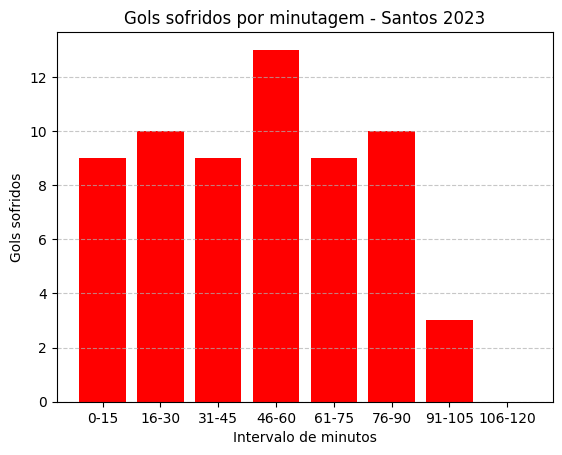

In [ ]:
import matplotlib.pyplot as plt


headers = {
    "x-apisports-key": api_key
}

url = "https://v3.football.api-sports.io/teams/statistics"

params = {
    "league": 71,        
    "season": 2023,
    "team": 128       
      
}


response = requests.get(url, headers=headers, params=params)

dados = response.json()["response"]

gols_minutos = dados["goals"]["against"]["minute"]

labels = []
values = []

for intervalo, info in gols_minutos.items():
    labels.append(intervalo)
    values.append(info["total"] if info["total"] is not None else 0)

plt.bar(labels, values, color="red")
plt.title("Gols sofridos por minutagem - Santos 2023")
plt.xlabel("Intervalo de minutos")
plt.ylabel("Gols sofridos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

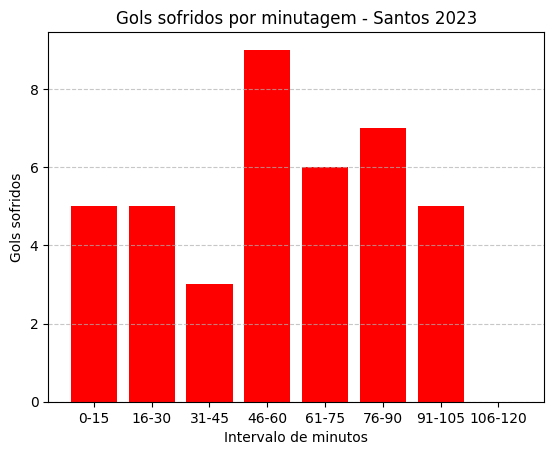

In [23]:
gols_minutos = dados["goals"]["for"]["minute"]
labels = []
values = []

for intervalo, info in gols_minutos.items():
    labels.append(intervalo)
    values.append(info["total"] if info["total"] is not None else 0)

plt.bar(labels, values, color="red")
plt.title("Gols sofridos por minutagem - Santos 2023")
plt.xlabel("Intervalo de minutos")
plt.ylabel("Gols sofridos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()